In [6]:
library(tidyverse)
library(GGally)  # ggpairs
library(MuMIn)  # AICc (Akaike Information Criterion corrected for small sample size)
library(readr)
library(ggplot2)
library(gridExtra)
library(rstanarm)
library(arm)
library(lattice)
library(lme4)

data <- read.csv('earnings.csv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Carregando pacotes exigidos: Rcpp

This is rstanarm version 2.21.4

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU 

In [2]:
head(data)

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,74,210,1,50000,50,White,16,16,16,3,3,2,0,0,45
2,66,125,0,60000,60,White,16,16,16,6,5,1,0,0,58
3,64,126,0,30000,30,White,16,16,16,8,1,2,1,1,29
4,65,200,0,25000,25,White,17,17,NA,8,1,2,0,0,57
5,63,110,0,50000,50,Other,16,16,16,5,6,2,0,0,91
6,68,165,0,62000,62,Black,18,18,18,1,1,2,2,2,54


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 244 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 295 rows containing non-finite values (`stat_smooth()`)."


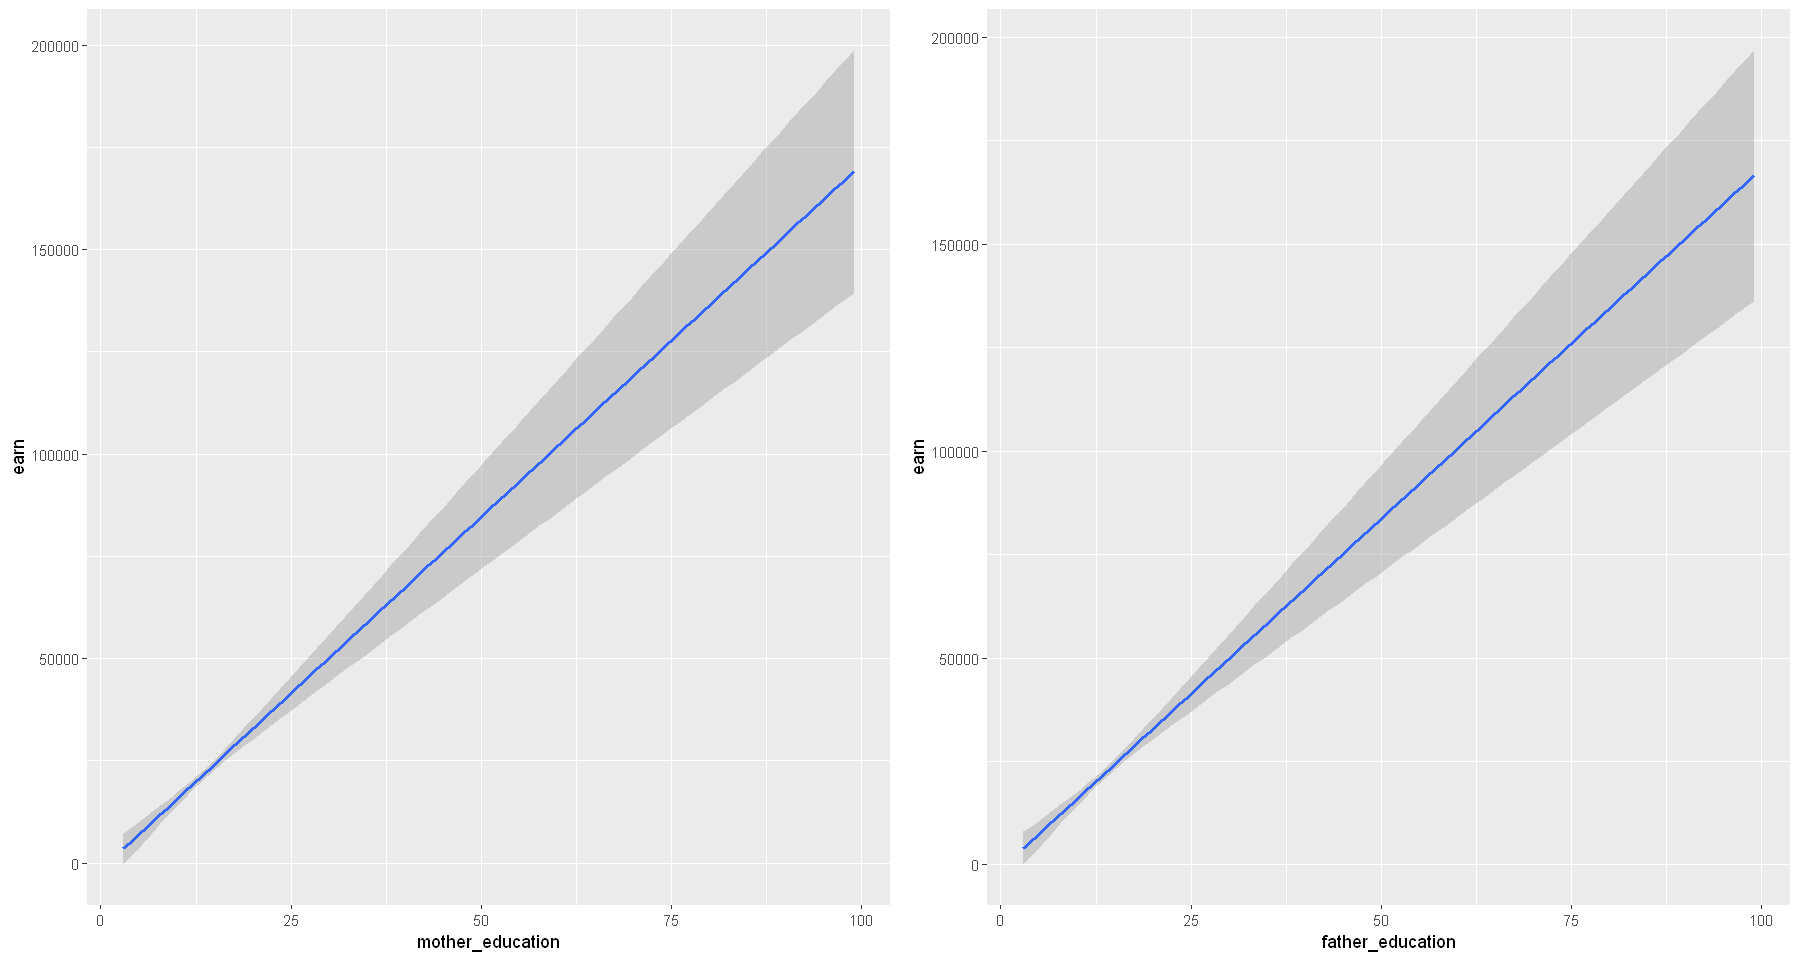

In [17]:
options(repr.plot.width = 15, repr.plot.height = 8)
a <- ggplot(data, aes(x = mother_education, y = earn)) + 
    
    geom_smooth(method = 'lm') 

b <- ggplot(data, aes(x = father_education, y = earn)) + 
    geom_smooth(method = 'lm')

grid.arrange(a, b, nrow = 1)

In [30]:
model1 <- glm(log(earn) ~ height + male,
                data = data, subset=(earn>0))


summary(model1)


Call:
glm(formula = log(earn) ~ height + male, data = data, subset = (earn > 
    0))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2749  -0.4243   0.1140   0.5767   2.8353  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.97633    0.50624  15.756  < 2e-16 ***
height       0.02383    0.00783   3.044  0.00237 ** 
male         0.37151    0.06168   6.023 2.11e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.7532281)

    Null deviance: 1331.3  on 1628  degrees of freedom
Residual deviance: 1224.7  on 1626  degrees of freedom
AIC: 4166.3

Number of Fisher Scoring iterations: 2


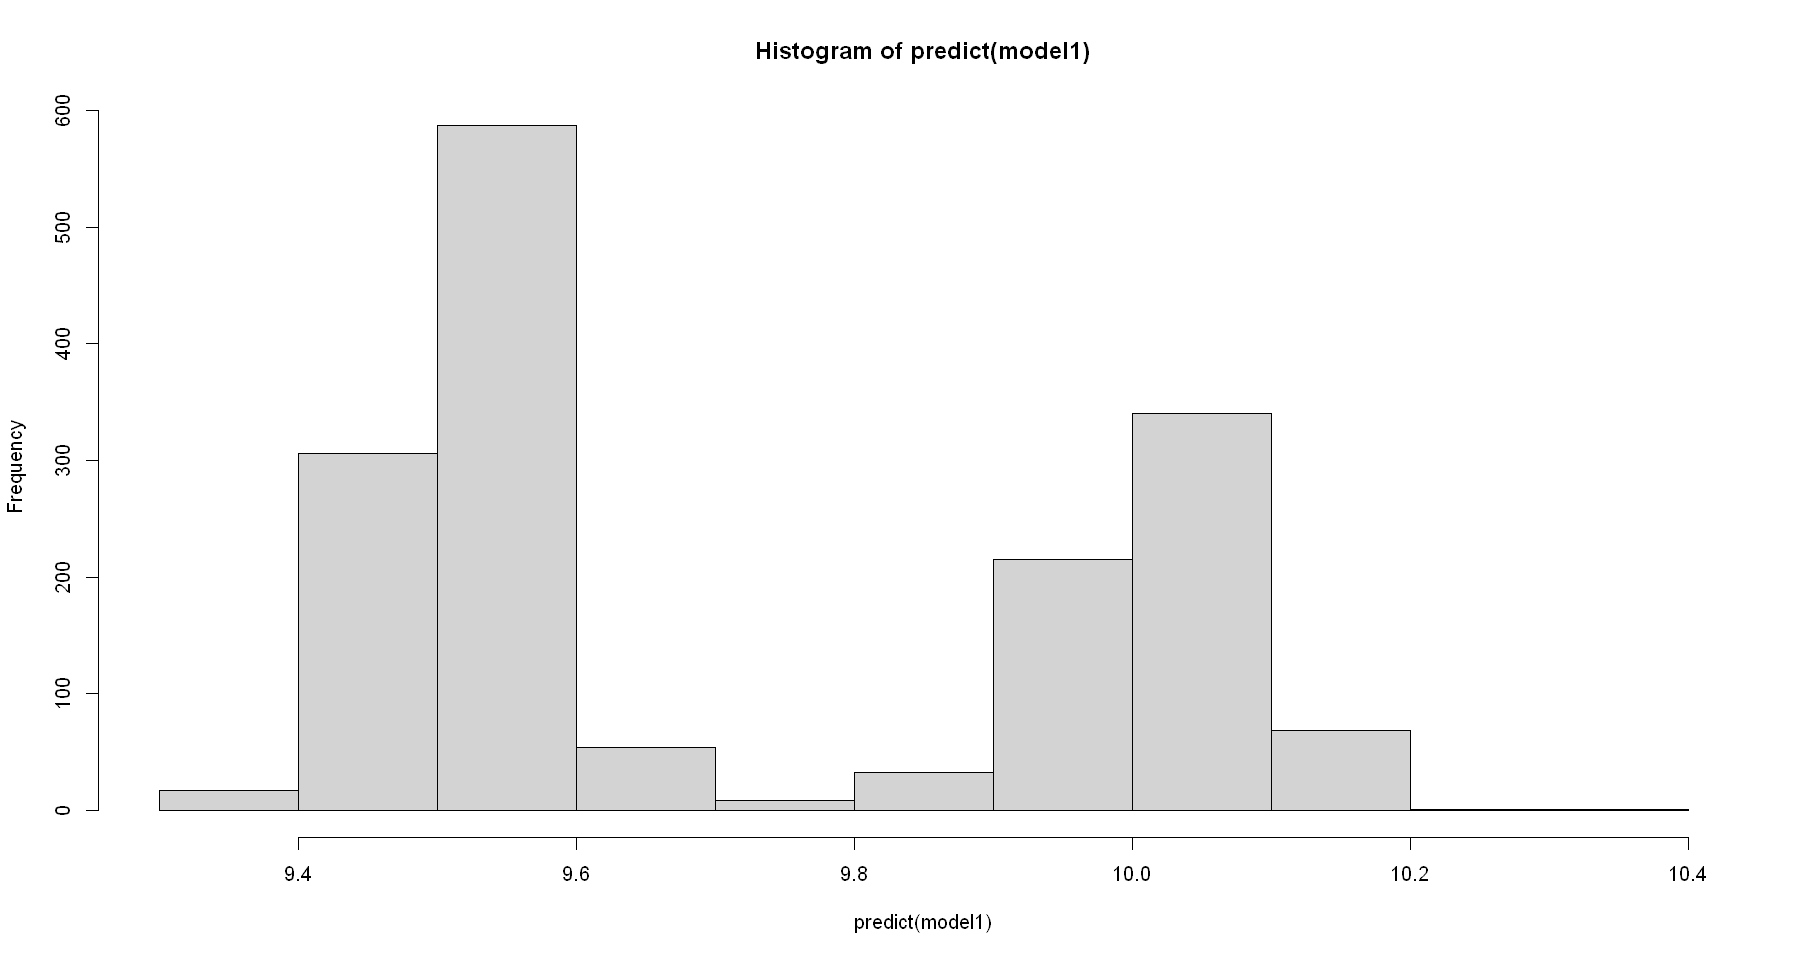

In [31]:
hist(predict(model1))

In [33]:
logmodel_1 <- stan_glm(log(earn) ~ height, data=data, subset=(earn>0))


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.113 seconds (Warm-up)
Chain 1:                0.346 seconds (Sampling)
Chain 1:                0.459 seconds

In [34]:
summary(logmodel_1)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      log(earn) ~ height
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 1629
 predictors:   2
 subset:       (earn > 0)

Estimates:
              mean   sd   10%   50%   90%
(Intercept) 5.9    0.4  5.4   5.9   6.4  
height      0.1    0.0  0.0   0.1   0.1  
sigma       0.9    0.0  0.9   0.9   0.9  

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 9.7    0.0  9.7   9.7   9.8  

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   0.0  1.0  4288 
height        0.0  1.0  4298 
sigma         0.0  1.0  3872 
mean_PPD      0.0  1.0  3972 
log-posterior 0.0  1.0  1835 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and

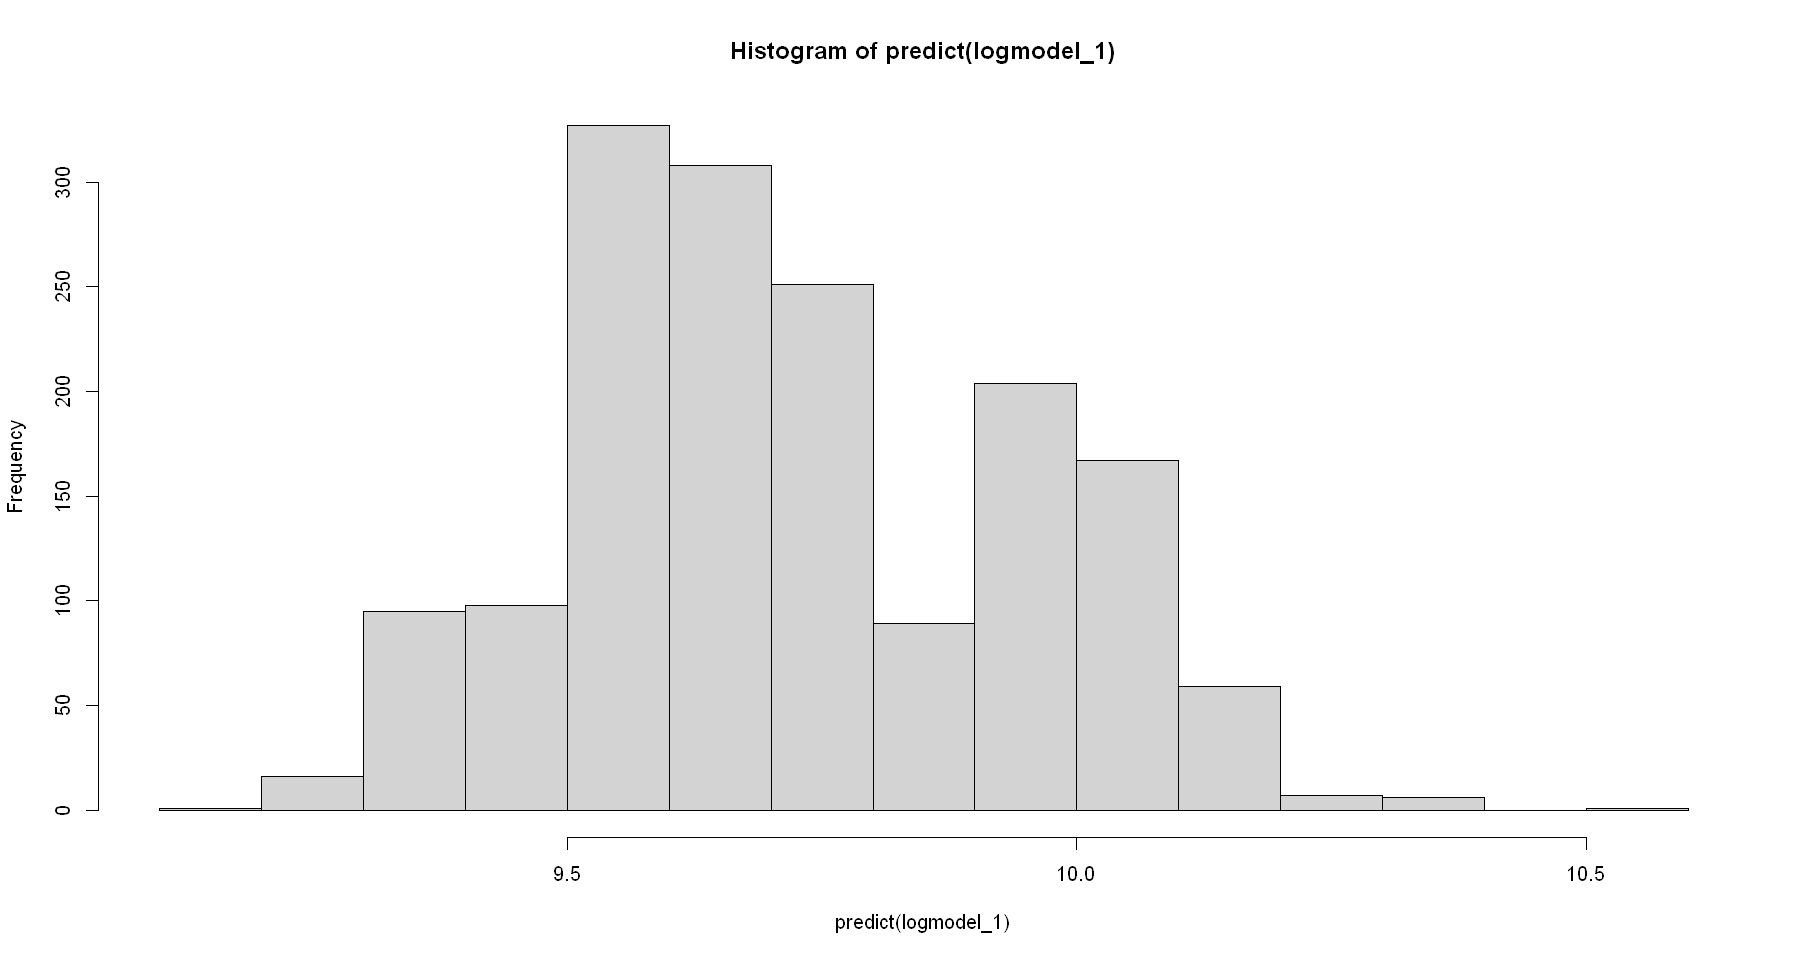

In [35]:
hist(predict(logmodel_1))

In [31]:
source('functions.r')

formula <- "earn ~ age + education"
y <- "earn"

leave_one_out <- function(row) {
    model <- glm(formula, data = data[-row, ])
    return(model_evaluation(model, data[row, ], data[[y]][row], FALSE))
}


result <- do.call(rbind, lapply(1:nrow(data), leave_one_out))

In [32]:
result[1:5,]

,Bias,RMSE,MARE,R2,AIC,BIC,AICc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-20593.537,20593.537,20593.537,NaN,41285.41,41307.42,41285.43
2,-28488.527,28488.527,28488.527,NaN,41284.55,41306.56,41284.57
3,-3195.288,3195.288,3195.288,NaN,41286.32,41308.33,41286.34
4,9296.549,9296.549,9296.549,NaN,41286.15,41308.16,41286.17
5,-13108.320,13108.320,13108.320,NaN,41285.97,41307.98,41285.99
